In [1]:
import sys
sys.path.append("/home/salmon/workspace/SpDev/SpCommon")
sys.path.append("/home/salmon/workspace/SpDev/SpDB")

from spdm.util.logger import logger
from spdm.data import connect
import matplotlib.pyplot as plt
import numpy as np
from spdm.data.plugins.PluginXML import open_xml


In [2]:
db = connect("imas+hdf5:///home/salmon/workspace/output/east_",
                         mapping_files=["/home/salmon/workspace/SpDev/SpDB/mapping/EAST/imas/3/static"])

entry = db.insert(shot=55555).entry



2020-10-13 08:48:15,959 INFO [spdm] /home/salmon/workspace/SpDev/SpDB/spdm/data/connect.py:12:connect: Load Data Plugin: IMAS_HDF5
2020-10-13 08:48:15,966 DEBUG [spdm] /home/salmon/workspace/SpDev/SpDB/spdm/data/plugins/PluginXML.py:124:load_mapping: Loading mapping file from /home/salmon/workspace/SpDev/SpDB/mapping/EAST/imas/3/static/magnetics.xml
2020-10-13 08:48:15,969 DEBUG [spdm] /home/salmon/workspace/SpDev/SpDB/spdm/data/plugins/PluginXML.py:124:load_mapping: Loading mapping file from /home/salmon/workspace/SpDev/SpDB/mapping/EAST/imas/3/static/wall.xml
2020-10-13 08:48:15,971 DEBUG [spdm] /home/salmon/workspace/SpDev/SpDB/spdm/data/plugins/PluginXML.py:124:load_mapping: Loading mapping file from /home/salmon/workspace/SpDev/SpDB/mapping/EAST/imas/3/static/pf_active.xml
2020-10-13 08:48:15,974 DEBUG [spdm] /home/salmon/workspace/SpDev/SpDB/spdm/data/Collection.py:107:__init__: Open Collection : /home/salmon/workspace/output/east_{shot:08}_{run}.h5
2020-10-13 08:48:15,975 DEBUG 

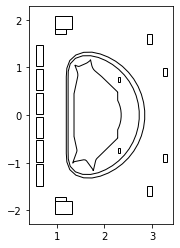

In [3]:
# doc = open_xml(["/home/salmon/workspace/SpDev/SpDB/mapping/EAST/imas/3/static"])
# entry = doc.entry

fg=plt.figure()


for coil in entry.pf_active.coil :
    rect=coil.element[0].geometry.rectangle.__value__()
    plt.gca().add_patch(plt.Rectangle((rect.r-rect.width/2.0,rect.z-rect.height/2.0),rect.width,rect.height,fill=False))

plt.gca().add_patch(plt.Polygon(np.array([entry.wall.description_2d.vessel.annular.outline_outer.r.__value__(),    
                                          entry.wall.description_2d.vessel.annular.outline_outer.z.__value__()]).transpose([1,0]),
                                fill=False,closed=True))

plt.gca().add_patch(plt.Polygon(np.array([entry.wall.description_2d.vessel.annular.outline_inner.r.__value__(),    
                                          entry.wall.description_2d.vessel.annular.outline_inner.z.__value__()]).transpose([1,0]),
                                fill=False,closed=True))

plt.gca().add_patch(plt.Polygon(np.array([entry.wall.description_2d[0].limiter.unit[0].outline.r.__value__(),
                                          entry.wall.description_2d[0].limiter.unit[0].outline.z.__value__()]).transpose([1,0]),
                                fill=False,closed=True))


plt.axis('scaled')
plt.show()

In [1]:
import pathlib


In [8]:
pathlib.Path("a/b/c/").with_suffix(".h5")


ValueError: Invalid suffix 'h5'

In [11]:
"{_id}" in "a/b/c/d/{_i}"

False